In [165]:
import pandas as pd
from dataset import Dataset
from dataread import Dataread
import seaborn as sns
import matplotlib.pyplot as plt
import os
import fsspec
import ast

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

ds = Dataset()
dr = Dataread()
JSON_KEY_PATH = "./sprintda05-soomin.json"
os.environ["GOOGlE_APPLICATION_CREDENTIALS"] = JSON_KEY_PATH
fs = fsspec.filesystem("gcs")


In [166]:
def target_list():
    question_record_school = pd.read_csv('./question_record_school.csv')
    school_list = question_record_school.school_id.unique()
    user_school = pd.read_csv('./user_school.csv')
    user_of_important_school = user_school.loc[user_school['school_id'].isin(school_list)]

    # 확인 가능한 해당 학교 유저 list
    result = user_of_important_school.user_id.unique()
    del question_record_school, user_school
    return result

# 리텐션 '기간' 정하기 EDA

In [2]:
from dateutil.parser import parse
import json

accounts_attendance_df = ds.votes.accounts_attendance()
strs = accounts_attendance_df['attendance_date_list'].fillna("[]").tolist()  # NAN 값을 리스트로 처리
lists = [json.loads(s) if s != "[]" else [] for s in strs]  # JSON 문자열을 파싱하여 리스트로 변환

# 리스트를 flatten 하기 이전, 2차원 구조를 유지하며 datetime 객체로 변환
lists_dates = [[parse(dt).date() for dt in sublist] for sublist in lists] 

# term: 날짜 간격 리스트
terms = [
    [(x[i+1] - x[i]).days for i in range(len(x)-1)] if len(x) >= 2 else []
    for x in lists_dates
]
persist = [
    (max(x) - min(x)).days if len(x) > 0 else 0 for x in lists_dates
]
# len: 리스트 길이
lengths = [len(x) for x in lists_dates]

# 결과 DataFrame 생성
attendance_df = pd.DataFrame({
    'user_id': accounts_attendance_df['user_id'],
    'term': terms,    
    'persist(days)': persist,
    'len': lengths
})

attendance_df['avg_term'] = attendance_df['term'].apply(lambda x: sum(x) / len(x) if x else 0).round(2)
display(attendance_df)


,user_id,term,persist(days),len,avg_term
0,1446852,"[1, 1, 1, 4, 3, 6, 3, 25, 21, 43, 2, 5]",115,13,9.58
1,1359398,"[2, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, ...",87,33,2.72
2,1501542,"[2, 1, 1, 1, 1, 4, 1, 7]",18,9,2.25
3,1507767,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",34,30,1.17
4,1287453,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,31,1.07
...,...,...,...,...,...
349632,897005,[],0,0,0.00
349633,1407059,[],0,1,0.00
349634,1583727,[],0,1,0.00
349635,1392372,[],0,1,0.00


In [15]:
attendance_df.describe()

,user_id,persist(days),len,avg_term
count,3.496370e+05,349637.000000,349637.000000,349637.000000
mean,1.247187e+06,25.356990,6.356098,5.417726
std,2.127986e+05,46.319985,9.158459,15.245151
min,8.321510e+05,0.000000,0.000000,0.000000
25%,1.065813e+06,0.000000,1.000000,0.000000
50%,1.261234e+06,7.000000,3.000000,1.570000
75%,1.437486e+06,26.000000,8.000000,3.800000
max,1.583730e+06,348.000000,310.000000,345.000000


In [17]:
attendance_df['len'].median()

3.0

In [20]:
print(attendance_df['avg_term'].median())
print(attendance_df.loc[attendance_df['len']>=8,'avg_term'].median())

1.57
2.29


In [21]:
print(attendance_df['persist(days)'].median())
print(attendance_df.loc[attendance_df['len']>=8,'persist(days)'].median())

7.0
31.0


In [59]:
attendance_df.loc[attendance_df['len']>=200,'avg_term'].describe()

count    26.000000
mean      1.280385
std       0.141492
min       1.100000
25%       1.155000
50%       1.280000
75%       1.345000
max       1.680000
Name: avg_term, dtype: float64

In [37]:
check = accounts_attendance_df.loc[accounts_attendance_df['user_id']==1499325].attendance_date_list

In [43]:
full_text = accounts_attendance_df.at[38551, 'attendance_date_list']
print(full_text)

["2023-05-27", "2023-05-28", "2023-05-29", "2023-05-30", "2023-06-01", "2023-06-02", "2023-06-03", "2023-06-04", "2023-06-05", "2023-06-06", "2023-06-07", "2023-06-08", "2023-06-09", "2023-06-12", "2023-06-13", "2023-06-14", "2023-06-15", "2023-06-16", "2023-06-17", "2023-06-18", "2023-06-19", "2023-06-20", "2023-06-21", "2023-06-22", "2023-06-23", "2023-06-24", "2023-06-25", "2023-06-26", "2023-06-27", "2023-06-28", "2023-06-29", "2023-06-30", "2023-07-01", "2023-07-02", "2023-07-03", "2023-07-04", "2023-07-05", "2023-07-06", "2023-07-07", "2023-07-08", "2023-07-10", "2023-07-11", "2023-07-12", "2023-07-13", "2023-07-14", "2023-07-15", "2023-07-16", "2023-07-17", "2023-07-18", "2023-07-19", "2023-07-20", "2023-07-21", "2023-07-22", "2023-07-23", "2023-07-24", "2023-07-25", "2023-07-26", "2023-07-27", "2023-07-28", "2023-07-29", "2023-07-30", "2023-07-31", "2023-08-01", "2023-08-02", "2023-08-03", "2023-08-04", "2023-08-05", "2023-08-06", "2023-08-07", "2023-08-08", "2023-08-09", "2023

In [12]:
exploded = attendance_df[['user_id', 'term']].explode('term')

In [13]:
exploded

,user_id,term
0,1446852,1
0,1446852,1
0,1446852,1
0,1446852,4
0,1446852,3
...,...,...
349632,897005,NaN
349633,1407059,NaN
349634,1583727,NaN
349635,1392372,NaN


In [ ]:
max_term = exploded.groupby('user_id')['term'].transform('max')
exploded['max_term'] = max_term
max_term_df = exploded.drop_duplicates('user_id')[['user_id', 'max_term']]

## 로열고객

In [69]:
royal = attendance_df.loc[attendance_df['len']>=100,'user_id'].unique()

In [66]:
polls = ds.votes.accounts_userquestionrecord()

In [70]:
polls.loc[polls['user_id'].isin(royal)]

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
36560,1653637,C,2023-05-01 11:37:27,849634,287,865130,2144581,0,N,2023-05-01 11:37:27,0,0
36569,1654102,C,2023-05-01 11:38:28,850903,175,865130,2144583,0,N,2023-05-01 11:38:28,0,0
36581,1654517,I,2023-05-01 11:39:23,855993,125,865130,2144584,0,N,2023-05-01 11:39:23,0,1
36586,1654624,C,2023-05-01 11:39:35,850903,242,865130,2144585,0,N,2023-05-01 11:39:35,0,0
36593,1654777,C,2023-05-01 11:39:51,850334,218,865130,2144586,0,N,2023-05-01 11:39:51,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1180158,150190843,C,2023-06-07 07:24:58,884526,2470,896512,189335628,0,N,2023-06-07 07:24:58,0,0
1180159,150191044,C,2023-06-07 07:25:10,1253539,2768,896512,189335629,1,N,2023-06-07 07:25:10,0,0
1190312,153047852,C,2023-06-10 13:45:42,876791,3676,896512,192748921,1,N,2023-06-10 13:45:42,0,0
1190317,153048402,C,2023-06-10 13:46:16,1253539,2712,896512,192748926,1,N,2023-06-10 13:46:16,0,0


## 학교 제한

In [71]:
attendance_df

,user_id,term,persist(days),len,avg_term
0,1446852,"[1, 1, 1, 4, 3, 6, 3, 25, 21, 43, 2, 5]",115,13,9.58
1,1359398,"[2, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, ...",87,33,2.72
2,1501542,"[2, 1, 1, 1, 1, 4, 1, 7]",18,9,2.25
3,1507767,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",34,30,1.17
4,1287453,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,31,1.07
...,...,...,...,...,...
349632,897005,[],0,0,0.00
349633,1407059,[],0,1,0.00
349634,1583727,[],0,1,0.00
349635,1392372,[],0,1,0.00


In [ ]:
target_user_list = target_list()

In [82]:
target_attendance_df = attendance_df.loc[attendance_df['user_id'].isin(target_user_list)].copy()

In [84]:
target_attendance_df.describe()

,user_id,persist(days),len,avg_term
count,2.198000e+03,2198.000000,2198.000000,2198.000000
mean,1.165868e+06,21.936306,5.433576,5.342125
std,2.209987e+05,43.780513,7.932344,16.630809
min,8.402930e+05,0.000000,0.000000,0.000000
25%,9.271335e+05,0.000000,1.000000,0.000000
50%,1.162476e+06,5.000000,3.000000,1.465000
75%,1.374695e+06,20.000000,7.000000,3.500000
max,1.578443e+06,332.000000,141.000000,309.000000


In [86]:
target_attendance_df.loc[target_attendance_df['len']>7,'avg_term'].describe()

count    506.000000
mean       4.227312
std        4.942775
min        1.000000
25%        1.380000
50%        2.145000
75%        5.000000
max       32.780000
Name: avg_term, dtype: float64

In [88]:
target_attendance_df.loc[target_attendance_df['len']>7].head(20)

,user_id,term,persist(days),len,avg_term
2,1501542,"[2, 1, 1, 1, 1, 4, 1, 7]",18,9,2.25
9,1406666,"[2, 1, 6, 1, 1, 2, 1, 1, 1, 1, 3, 2]",22,13,1.83
558,1464402,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, ...",116,38,3.14
2453,1427258,"[2, 1, 4, 1, 4, 1, 33]",46,8,6.57
2778,1372858,"[1, 1, 1, 1, 3, 1, 1, 1, 4, 4, 4, 47, 1, 1, 1,...",118,29,4.21
2826,1439157,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,10,1.00
2899,1409442,"[1, 1, 1, 1, 1, 1, 1, 2, 4]",13,10,1.44
2923,1247669,"[2, 1, 1, 1, 1, 1, 2, 1, 16, 35, 2, 1, 3, 47, 2]",116,16,7.73
3134,1127595,"[2, 1, 1, 1, 1, 2, 3]",11,8,1.57
3952,1374322,"[1, 1, 1, 3, 1, 1, 1, 4, 3]",16,10,1.78


In [131]:
graph_df = target_attendance_df[['user_id','term']].explode('term').fillna(0)
graph_df.loc[graph_df['term']>=10,'term' ] = 10
graph_df = graph_df.groupby('term')['user_id'].size()
graph_df

term
0      711
1     6007
2     1574
3      646
4      337
5      185
6      123
7      112
8       68
9       68
10     749
Name: user_id, dtype: int64

In [136]:
print('1일 간격 접속비중:', 6007 / graph_df.sum())
print('2일 간격 접속비중:', 1574 / graph_df.sum())

1일 간격 접속비중: 0.5677693761814745
2일 간격 접속비중: 0.1487712665406427


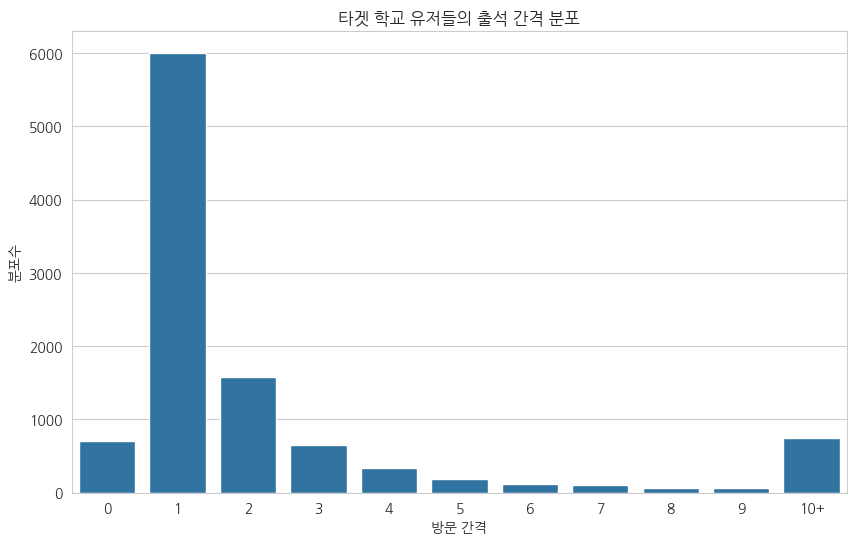

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=graph_df.index, y=graph_df.values)
plt.title('타겟 학교 유저들의 출석 간격 분포')
plt.ylabel('분포수')
plt.xlabel('방문 간격')

xtick_labels = [str(i) for i in range(10)] + ['10+']
plt.xticks(ticks=range(11), labels=xtick_labels)

plt.show()

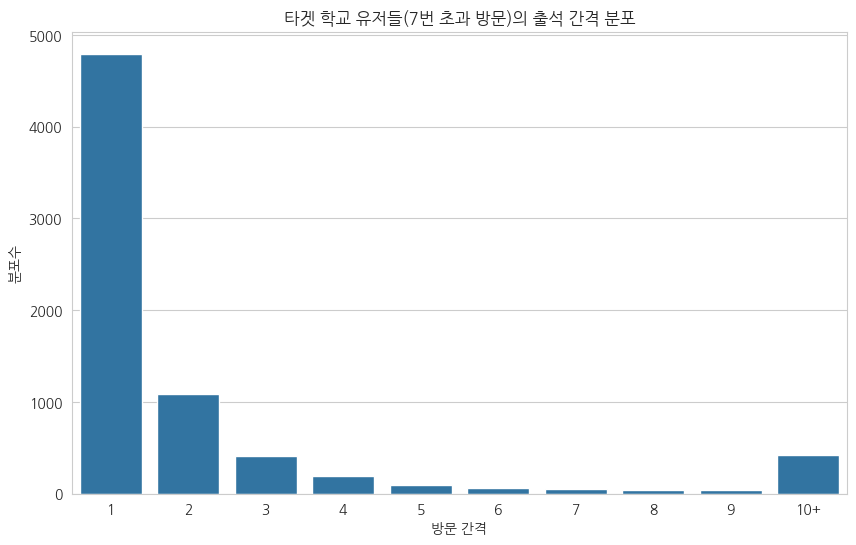

In [111]:
graph_df = target_attendance_df.loc[target_attendance_df['len']>7][['user_id','term']].explode('term').fillna(0)
graph_df.loc[graph_df['term']>=10,'term' ] = 10
graph_df = graph_df.groupby('term')['user_id'].size()
plt.figure(figsize=(10,6))
sns.barplot(x=graph_df.index, y=graph_df.values)
plt.title('타겟 학교 유저들(7번 초과 방문)의 출석 간격 분포')
plt.ylabel('분포수')
plt.xlabel('방문 간격')

xtick_labels = [str(i) for i in range(1,10)] + ['10+']
plt.xticks(ticks=range(10), labels=xtick_labels)

plt.show()

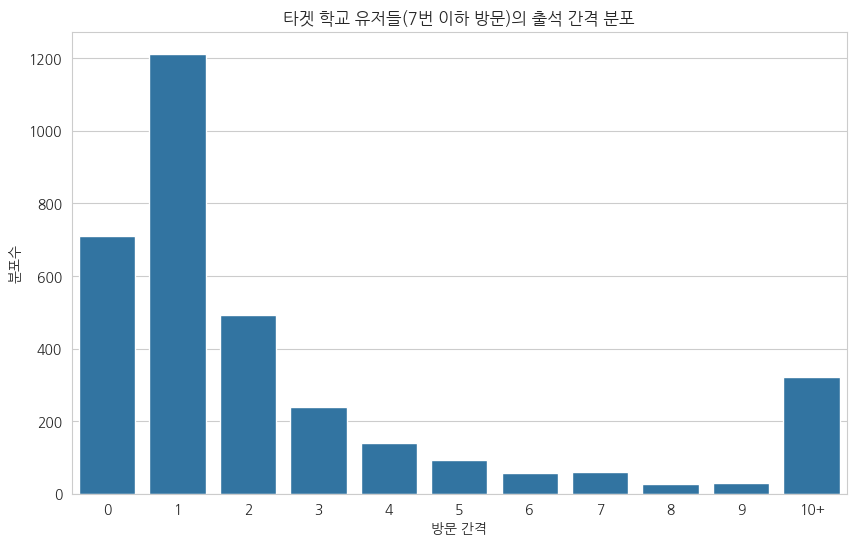

In [113]:
graph_df = target_attendance_df.loc[target_attendance_df['len']<=7][['user_id','term']].explode('term').fillna(0)
graph_df.loc[graph_df['term']>=10,'term' ] = 10
graph_df = graph_df.groupby('term')['user_id'].size()
plt.figure(figsize=(10,6))
sns.barplot(x=graph_df.index, y=graph_df.values)
plt.title('타겟 학교 유저들(7번 이하 방문)의 출석 간격 분포')
plt.ylabel('분포수')
plt.xlabel('방문 간격')

xtick_labels = [str(i) for i in range(10)] + ['10+']
plt.xticks(ticks=range(11), labels=xtick_labels)

plt.show()

### 날짜제한

In [117]:
import datetime

restrict_dates = datetime.date(2023,8,1)

In [120]:
filtered_dates = [
    [d for d in sublist if d < restrict_dates]
    for sublist in lists_dates
]

# term: 날짜 간격 리스트
terms = [
    [(x[i+1] - x[i]).days for i in range(len(x)-1)] if len(x) >= 2 else []
    for x in filtered_dates
]
persist = [
    (max(x) - min(x)).days if len(x) > 0 else 0 for x in filtered_dates
]
# len: 리스트 길이
lengths = [len(x) for x in filtered_dates]

# 결과 DataFrame 생성
filtered_attendance_df = pd.DataFrame({
    'user_id': accounts_attendance_df['user_id'],
    'term': terms,    
    'persist(days)': persist,
    'len': lengths
})

filtered_attendance_df['avg_term'] = filtered_attendance_df['term'].apply(lambda x: sum(x) / len(x) if x else 0).round(2)
display(filtered_attendance_df)

,user_id,term,persist(days),len,avg_term
0,1446852,"[1, 1, 1, 4, 3, 6, 3, 25, 21]",65,10,7.22
1,1359398,"[2, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, ...",60,26,2.40
2,1501542,"[2, 1, 1, 1, 1, 4, 1, 7]",18,9,2.25
3,1507767,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",34,30,1.17
4,1287453,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,31,1.07
...,...,...,...,...,...
349632,897005,[],0,0,0.00
349633,1407059,[],0,0,0.00
349634,1583727,[],0,0,0.00
349635,1392372,[],0,0,0.00


In [ ]:
filtered_target_attendance_df = filtered_attendance_df.loc[filtered_attendance_df['user_id'].isin(target_user_list)].copy()

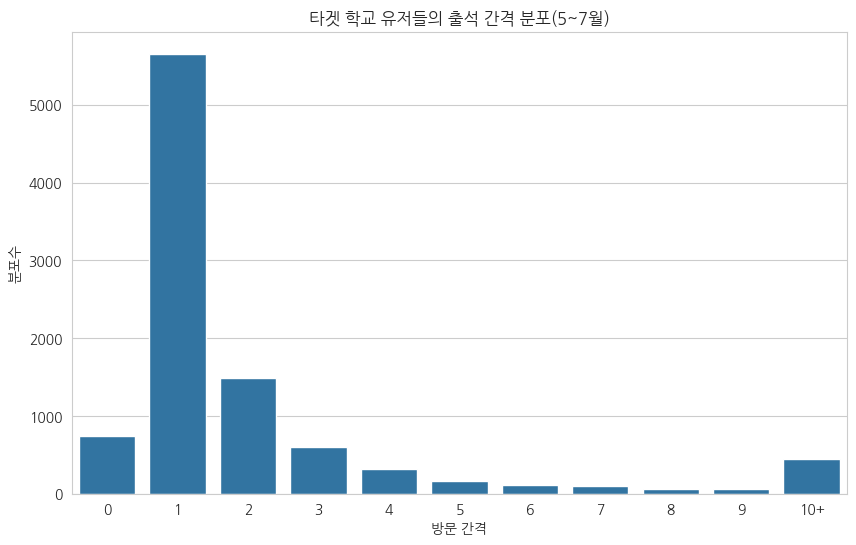

In [139]:
graph_df = filtered_target_attendance_df[['user_id','term']].explode('term').fillna(0)
graph_df.loc[graph_df['term']>=10,'term' ] = 10
graph_df = graph_df.groupby('term')['user_id'].size()
plt.figure(figsize=(10,6))
sns.barplot(x=graph_df.index, y=graph_df.values)
plt.title('타겟 학교 유저들의 출석 간격 분포(5~7월)')
plt.ylabel('분포수')
plt.xlabel('방문 간격')

xtick_labels = [str(i) for i in range(10)] + ['10+']
plt.xticks(ticks=range(11), labels=xtick_labels)

plt.show()

In [141]:
graph_df

term
0      745
1     5657
2     1494
3      602
4      314
5      169
6      109
7      101
8       63
9       56
10     444
Name: user_id, dtype: int64

In [143]:
print('5-7월 제한')
print('1일 간격 접속비중:', 5657 / graph_df.sum())
print('2일 간격 접속비중:', 1494 / graph_df.sum())

5-7월 제한
1일 간격 접속비중: 0.5799671929464835
2일 간격 접속비중: 0.15316793110518762


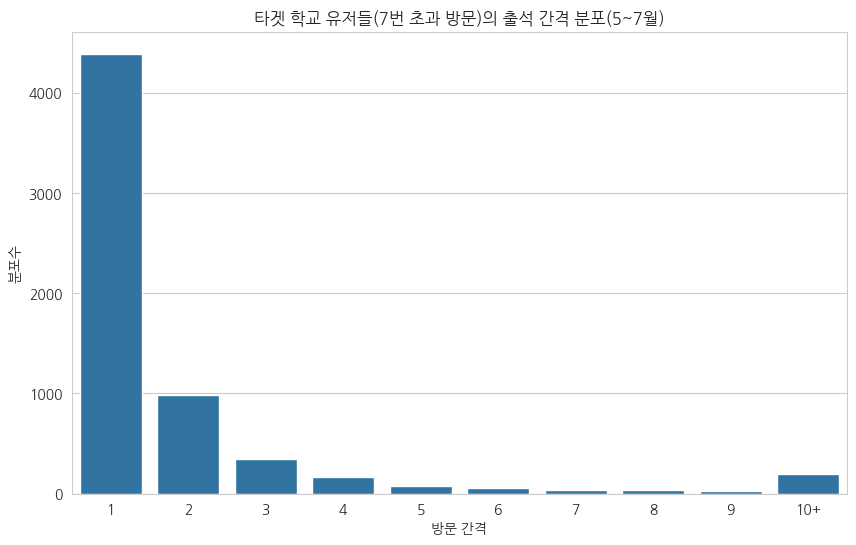

In [126]:
graph_df = filtered_target_attendance_df.loc[filtered_target_attendance_df['len']>7][['user_id','term']].explode('term').fillna(0)
graph_df.loc[graph_df['term']>=10,'term' ] = 10
graph_df = graph_df.groupby('term')['user_id'].size()
plt.figure(figsize=(10,6))
sns.barplot(x=graph_df.index, y=graph_df.values)
plt.title('타겟 학교 유저들(7번 초과 방문)의 출석 간격 분포(5~7월)')
plt.ylabel('분포수')
plt.xlabel('방문 간격')

xtick_labels = [str(i) for i in range(1,10)] + ['10+']
plt.xticks(ticks=range(10), labels=xtick_labels)

plt.show()

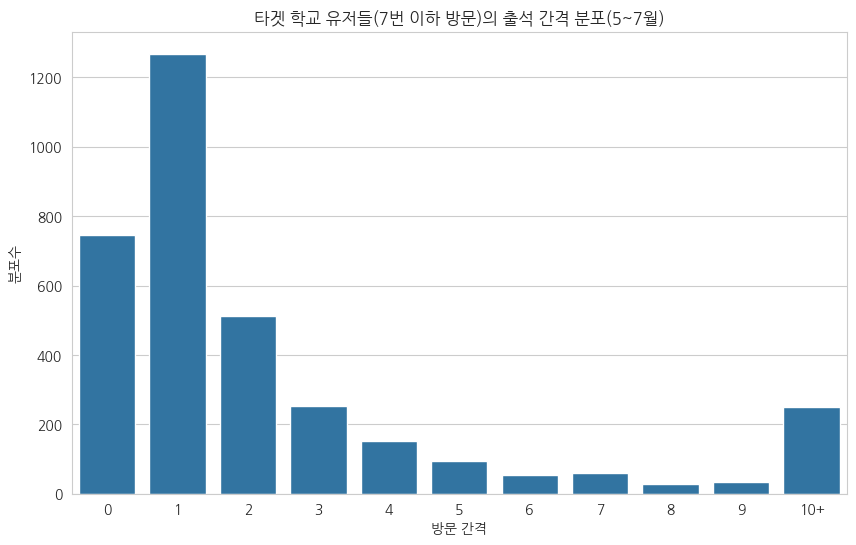

In [127]:
graph_df = filtered_target_attendance_df.loc[filtered_target_attendance_df['len']<=7][['user_id','term']].explode('term').fillna(0)
graph_df.loc[graph_df['term']>=10,'term' ] = 10
graph_df = graph_df.groupby('term')['user_id'].size()
plt.figure(figsize=(10,6))
sns.barplot(x=graph_df.index, y=graph_df.values)
plt.title('타겟 학교 유저들(7번 이하 방문)의 출석 간격 분포(5~7월)')
plt.ylabel('분포수')
plt.xlabel('방문 간격')

xtick_labels = [str(i) for i in range(10)] + ['10+']
plt.xticks(ticks=range(11), labels=xtick_labels)

plt.show()

## len 분포

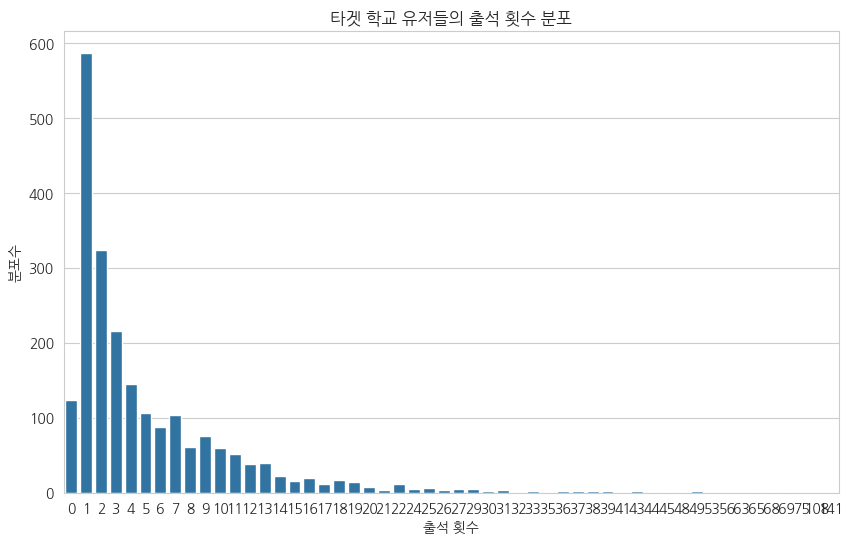

In [129]:
graph_df = target_attendance_df[['user_id','len']]

graph_df = graph_df.groupby('len')['user_id'].size()
plt.figure(figsize=(10,6))
sns.barplot(x=graph_df.index, y=graph_df.values)
plt.title('타겟 학교 유저들의 출석 횟수 분포')
plt.ylabel('분포수')
plt.xlabel('출석 횟수')

plt.show()

### attendance 테이블의 기묘함
- 0회로 찍히는 유저는 어떤 유저일까?
만약, 5월 29일 (출석체크 기능이 업데이트 된 날로 추정) 이후로 가입한 유저들은 자동으로 생성되지만, 출석을 누르지 않으면 0회로 처리되는건가?
아니면 5월 29일 이전에 생성하였으나 이후 접속기록이 없는 것일까?

In [ ]:
accounts_user = ds.votes.accounts_user()

In [150]:
attendance_list = target_attendance_df.loc[target_attendance_df['len']==0].user_id.unique()

In [151]:
accounts_user.loc[accounts_user['id'].isin(attendance_list)]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
4888,844630,0,0,F,5325,"[989697, 883202, 896003, 939523, 886789, 90829...",1,2023-04-24 08:36:29.218277,[],[],N,0,1,0,134,2466.0
8702,849475,0,0,M,47,"[849922, 847375, 850457, 849436, 849438, 84944...",1,2023-04-28 03:24:22.739573,[],[],N,0,0,0,98,3944.0
9189,850091,0,0,M,203,"[849922, 849670, 850695, 850186, 850058, 85057...",1,2023-04-28 13:30:54.341308,[],[],N,0,0,0,0,757.0
10140,851251,0,0,M,486,"[850120, 850217, 850413, 849582, 850127, 85060...",1,2023-04-29 04:44:52.939555,[],[],N,0,0,0,0,3966.0
10324,851491,0,0,F,360,"[858120, 868882, 850457, 849436, 849438, 84943...",1,2023-04-29 06:24:05.009586,[],[],N,0,1,0,152,3942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653426,1558102,0,0,M,168,"[896512, 1025412, 923141, 882697, 1550358, 151...",1,2023-05-31 13:24:51.581533,[],[],N,0,2,0,22,9455.0
665110,1570726,0,0,F,361,"[1198721, 865667, 874884, 1528706, 1001607, 97...",1,2023-06-06 11:52:56.974170,[],[],N,0,1,0,2,22172.0
669393,1575391,0,0,F,442,"[849543, 849549, 1124494, 847375, 849439, 8494...",1,2023-06-13 13:08:36.944053,[],[],N,0,1,0,6,3942.0
670591,1576705,0,0,M,458,"[1133824, 1308681, 1232271, 1278736, 1276308, ...",1,2023-06-19 23:34:39.260034,[],[],N,0,1,0,0,48970.0


5월 29일 이전 가입자도, 이후 가입자도 존재.

session_start가 없는걸까?

# 코호트 리텐션 분석하기

## 6월 12일 이전과 이후 그룹의 일주일 리텐션

- user_withdraw로 보건데, 6월 12일 기점으로 순유출이 더 많아졌다.
- 이 시기를 기준잡아 두 시기의 코호트는 어떻게 달라질까?

### attendance를 기준으로
- 해당 일자에 첫 출석한 유저를 분모로

In [ ]:
accounts_attendance_df = ds.votes.accounts_attendance()
target_user_list = target_list()

In [ ]:
# 필요한 데이터만 필터링
target_attendance_df = accounts_attendance_df.loc[accounts_attendance_df['user_id'].isin(target_user_list)][['user_id','attendance_date_list']]

# explode전, json 리스트를 실제 리스트화
target_attendance_df['attendance_date_list'] = target_attendance_df['attendance_date_list'].apply(ast.literal_eval)

# explode 진행 & dropna (출석 기록이 없는 유저)
exploded_target_attendance_df = target_attendance_df.explode('attendance_date_list').dropna()

In [174]:
exploded_target_attendance_first_df = exploded_target_attendance_df.sort_values(by='attendance_date_list').drop_duplicates(subset='user_id', keep='first')

In [229]:
mask1 = exploded_target_attendance_first_df['attendance_date_list'] >= '2023-05-27'
mask2 = exploded_target_attendance_first_df['attendance_date_list'] < '2023-06-20'

graph_df = exploded_target_attendance_first_df.loc[ mask1 & mask2 ]
graph_df['attendance_date_list'] = pd.to_datetime(graph_df['attendance_date_list']).dt.floor("D")
graph_df = graph_df.groupby('attendance_date_list').size()

/tmp/ipykernel_674351/1394270517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['attendance_date_list'] = pd.to_datetime(graph_df['attendance_date_list']).dt.floor("D")


In [230]:
# 날짜 범위 생성 (전체 포함: 최소~최대)
full_range = pd.date_range(start=graph_df.index.min(), end=graph_df.index.max(), freq='D')
graph_df_filled = graph_df.reindex(full_range, fill_value=0)
graph_df_filled

2023-05-27    403
2023-05-28    402
2023-05-29    558
2023-05-30    279
2023-05-31     66
2023-06-01     41
2023-06-02     55
2023-06-03     26
2023-06-04     20
2023-06-05     13
2023-06-06     16
2023-06-07      3
2023-06-08      7
2023-06-09      4
2023-06-10      2
2023-06-11      6
2023-06-12      6
2023-06-13      2
2023-06-14      1
2023-06-15      0
2023-06-16      1
2023-06-17      1
2023-06-18      4
2023-06-19      2
Freq: D, dtype: int64

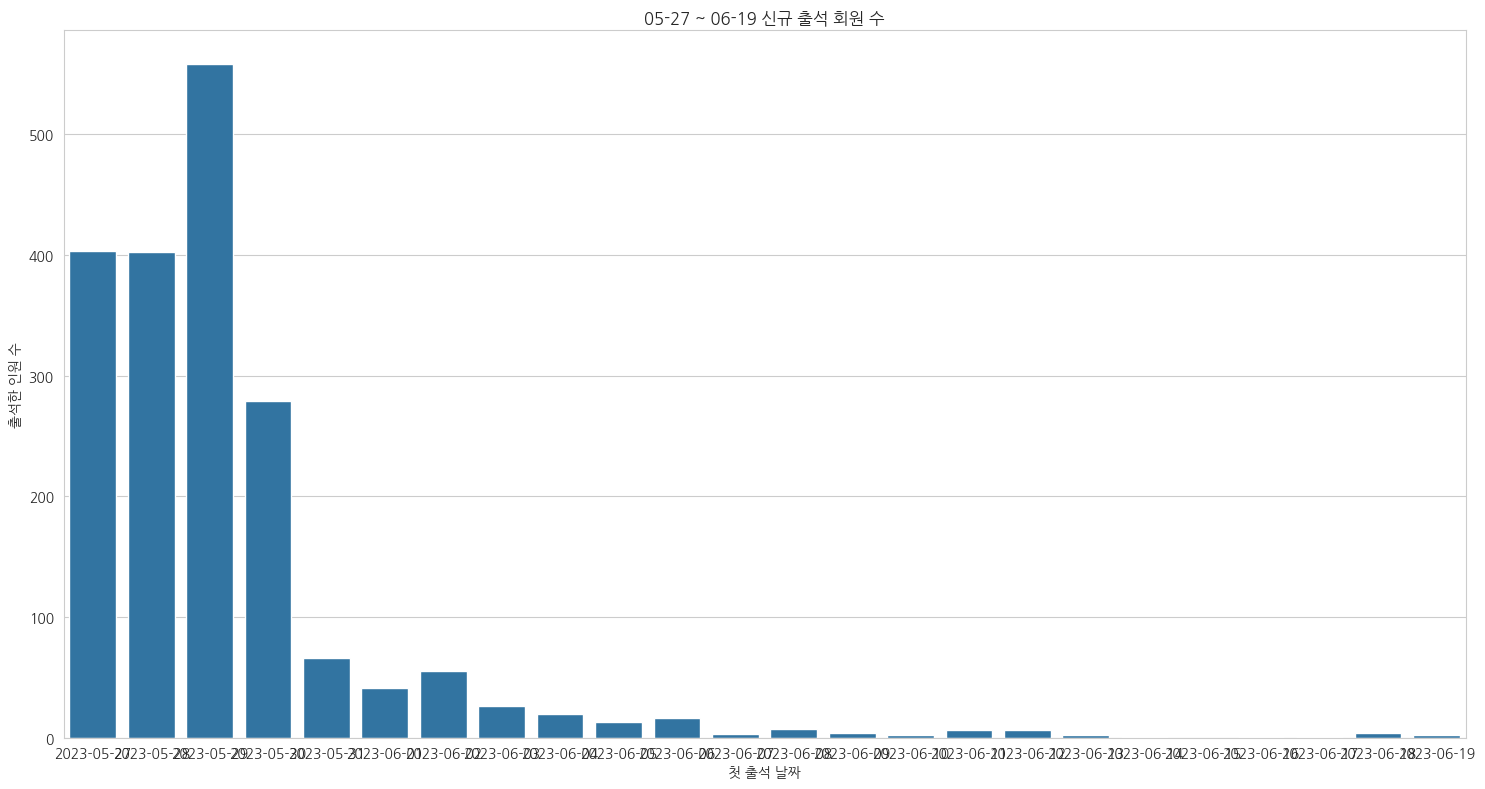

In [232]:
plt.figure(figsize=(15,8))
plt.title("05-27 ~ 06-19 신규 출석 회원 수")
sns.barplot(x=graph_df_filled.index, y=graph_df_filled.values)
plt.xlabel("첫 출석 날짜")
plt.ylabel("출석한 인원 수")
plt.tight_layout()
plt.show()

### Question 참여를 기준으로
- 해당 일자에 참여한 유저만 분모로

## 방문 횟수가 7회 이상인 유저그룹과 아닌 유저 그룹의 리텐션
- 어 근데 이게 의미가있나..? 7회 이상이 무조건 7일 이상 리텐션이 나올건데...
- 아하 모먼트 탐색 방법론으로써의 방문 횟수 7회 (?) 7번 이상 방문한 유저 코호트는 어떤 특징을 가지고 있는가에 대한 분석

### attendance를 기준으로
- (?)

### Question 참여를 기준으로
- (?)